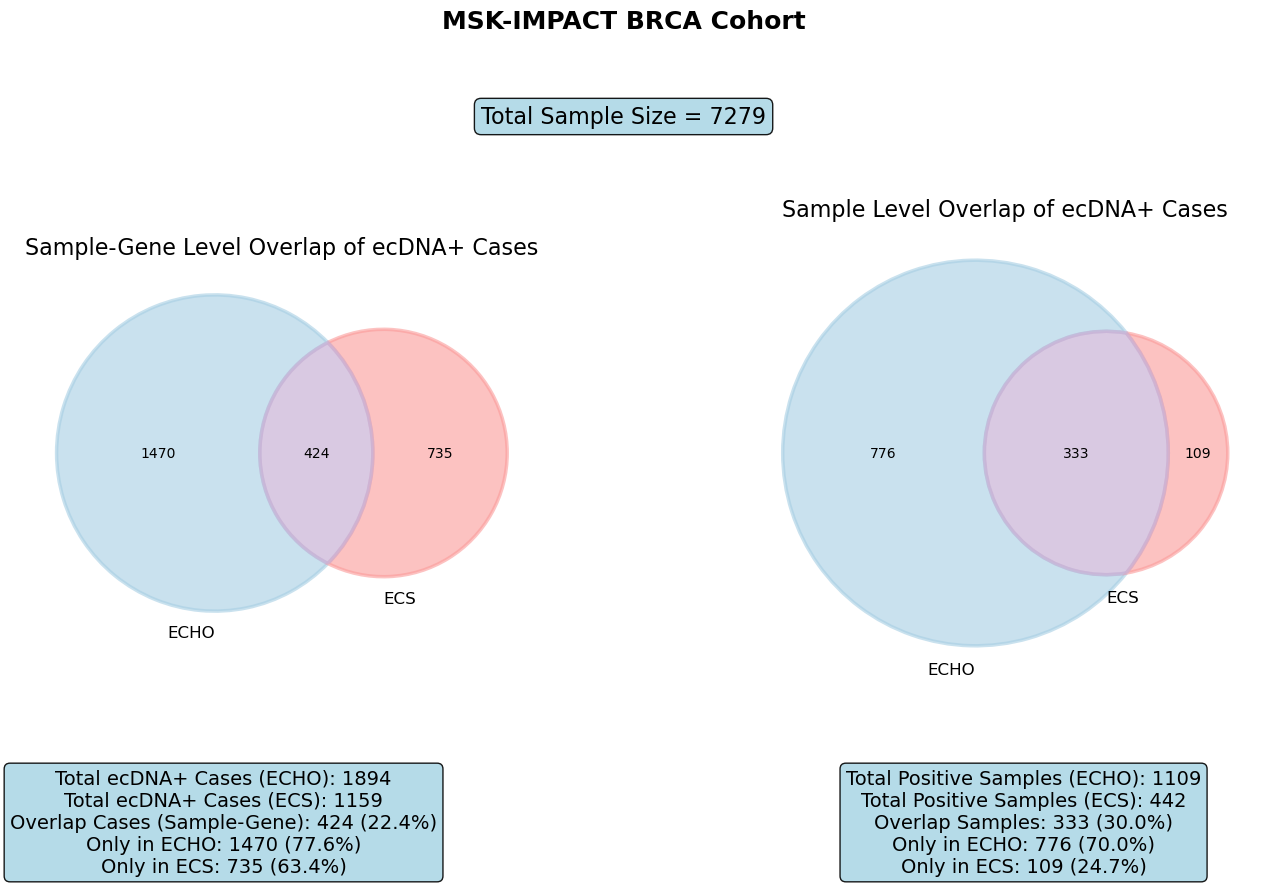

In [32]:
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import os

# Define the directory and file paths
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
file1 = "merged.ECHO_results.csv"  # Old version file name
file2 = "merged_ecDNA_results_filtered_p_ecDNA.tsv"  # New version file name

# Define total sample size
total_sample_size = 7279

# Construct full paths
file1_path = os.path.join(directory, file1)
file2_path = os.path.join(directory, file2)

# Load data
old_data = pd.read_csv(file1_path)
new_data = pd.read_csv(file2_path, sep='\t')

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter for ecDNA+ cases (ecDNA_prob >= 0.5)
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)]
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)]

# Extract unique sample-gene and sample-only sets
old_ecDNA_set_gene = set(old_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1))
new_ecDNA_set_gene = set(new_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1))

old_ecDNA_set_sample = set(old_ecDNA['sample_id'].unique())
new_ecDNA_set_sample = set(new_ecDNA['sample_id'].unique())

# Calculate overlaps for both sample-gene level and sample level
only_old_gene = len(old_ecDNA_set_gene - new_ecDNA_set_gene)
only_new_gene = len(new_ecDNA_set_gene - old_ecDNA_set_gene)
overlap_gene = len(old_ecDNA_set_gene & new_ecDNA_set_gene)

only_old_sample = len(old_ecDNA_set_sample - new_ecDNA_set_sample)
only_new_sample = len(new_ecDNA_set_sample - old_ecDNA_set_sample)
overlap_sample = len(old_ecDNA_set_sample & new_ecDNA_set_sample)

# Count totals and percentages
total_old_gene = len(old_ecDNA_set_gene)
total_new_gene = len(new_ecDNA_set_gene)
total_old_sample = len(old_ecDNA_set_sample)
total_new_sample = len(new_ecDNA_set_sample)

percent_only_old_gene = (only_old_gene / total_old_gene) * 100
percent_only_new_gene = (only_new_gene / total_new_gene) * 100
percent_overlap_gene = (overlap_gene / total_old_gene) * 100

percent_only_old_sample = (only_old_sample / total_old_sample) * 100
percent_only_new_sample = (only_new_sample / total_new_sample) * 100
percent_overlap_sample = (overlap_sample / total_old_sample) * 100

# Step 6: Plot Venn diagrams with title, separate text boxes, and save in high resolution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Increase space between subplots and titles

# Add main title
plt.suptitle("MSK-IMPACT BRCA Cohort", fontsize=18, fontweight="bold", y=1.05)

# Top center box with total sample size
top_text = f"Total Sample Size = {total_sample_size}"
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.9)
plt.gcf().text(0.5, 0.93, top_text, ha='center', va='top', fontsize=16, bbox=props)

# Left Plot: Sample-Gene Level Venn Diagram
venn_gene = venn2(ax=ax1, subsets=(only_old_gene, only_new_gene, overlap_gene), set_labels=('ECHO', 'ECS'))
venn_gene.get_patch_by_id('10').set_color('#a6cee3')
venn_gene.get_patch_by_id('01').set_color('#fb9a99')
venn_gene.get_patch_by_id('11').set_color('#cab2d6')
venn_gene.get_patch_by_id('10').set_alpha(0.6)
venn_gene.get_patch_by_id('01').set_alpha(0.6)
venn_gene.get_patch_by_id('11').set_alpha(0.7)

# Make boundaries thicker for each circle in sample-gene level Venn
for patch in ['10', '01', '11']:
    venn_gene.get_patch_by_id(patch).set_linewidth(2.5)

# Title for left Venn diagram
ax1.set_title("Sample-Gene Level Overlap of ecDNA+ Cases", fontsize=16, fontweight="normal")

# Text box for sample-gene level with larger font size
textstr_gene = (f"Total ecDNA+ Cases (ECHO): {total_old_gene}\n"
                f"Total ecDNA+ Cases (ECS): {total_new_gene}\n"
                f"Overlap Cases (Sample-Gene): {overlap_gene} ({percent_overlap_gene:.1f}%)\n"
                f"Only in ECHO: {only_old_gene} ({percent_only_old_gene:.1f}%)\n"
                f"Only in ECS: {only_new_gene} ({percent_only_new_gene:.1f}%)")
plt.gcf().text(0.25, 0.1, textstr_gene, ha='center', va='top', fontsize=14, bbox=props)

# Right Plot: Sample Level Venn Diagram
venn_sample = venn2(ax=ax2, subsets=(only_old_sample, only_new_sample, overlap_sample), set_labels=('ECHO', 'ECS'))
venn_sample.get_patch_by_id('10').set_color('#a6cee3')
venn_sample.get_patch_by_id('01').set_color('#fb9a99')
venn_sample.get_patch_by_id('11').set_color('#cab2d6')
venn_sample.get_patch_by_id('10').set_alpha(0.6)
venn_sample.get_patch_by_id('01').set_alpha(0.6)
venn_sample.get_patch_by_id('11').set_alpha(0.7)

# Make boundaries thicker for each circle in sample level Venn
for patch in ['10', '01', '11']:
    venn_sample.get_patch_by_id(patch).set_linewidth(2.5)

# Title for right Venn diagram
ax2.set_title("Sample Level Overlap of ecDNA+ Cases", fontsize=16, fontweight="normal")

# Text box for sample level with larger font size
textstr_sample = (f"Total Positive Samples (ECHO): {total_old_sample}\n"
                  f"Total Positive Samples (ECS): {total_new_sample}\n"
                  f"Overlap Samples: {overlap_sample} ({percent_overlap_sample:.1f}%)\n"
                  f"Only in ECHO: {only_old_sample} ({percent_only_old_sample:.1f}%)\n"
                  f"Only in ECS: {only_new_sample} ({percent_only_new_sample:.1f}%)")
plt.gcf().text(0.75, 0.1, textstr_sample, ha='center', va='top', fontsize=14, bbox=props)

# Adjust layout and save the figure
output_path = os.path.join(directory, "venn_diagram_comparison_all_genes.png")
plt.savefig(output_path, format="png", dpi=600, bbox_inches="tight")

plt.show()


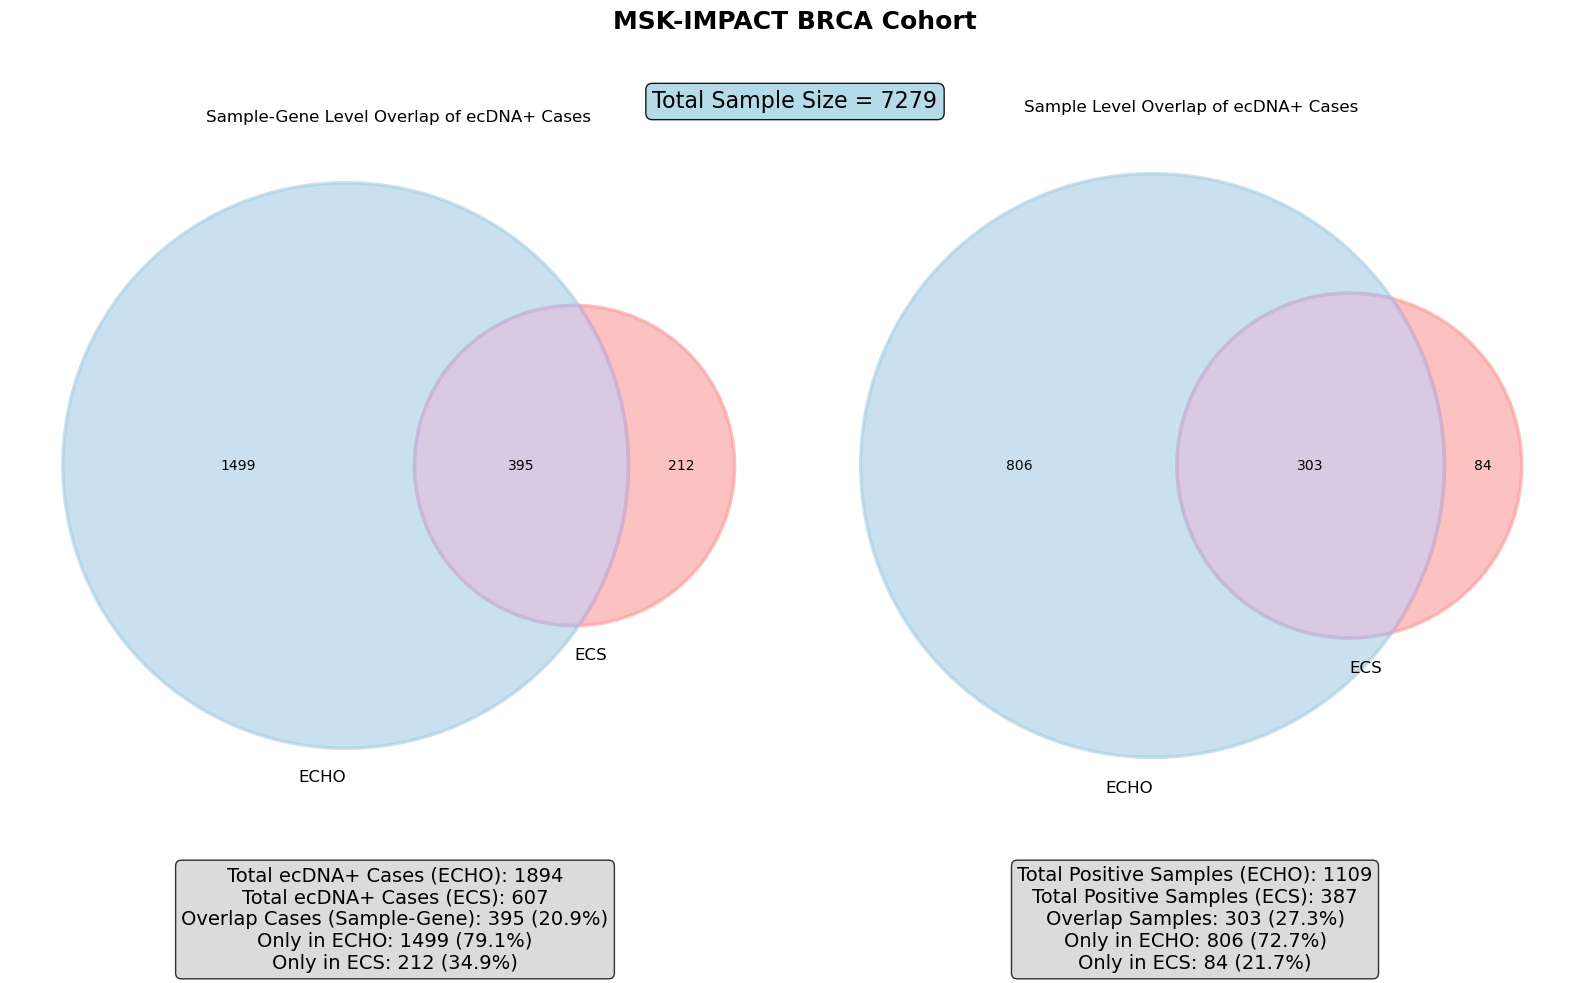

In [26]:
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import os

# Define the directory and file paths
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
file1 = "merged.ECHO_results.csv"  # Old version file name
file2 = "merged_ecDNA_results_filtered_p_ecDNA_filtered_impactGeneList.tsv"  # New version file name

# Define total sample size
total_sample_size = 7279

# Construct full paths
file1_path = os.path.join(directory, file1)
file2_path = os.path.join(directory, file2)

# Load data
old_data = pd.read_csv(file1_path)
new_data = pd.read_csv(file2_path, sep='\t')

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter for ecDNA+ cases (ecDNA_prob >= 0.5)
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)]
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)]

# Extract unique sample-gene and sample-only sets
old_ecDNA_set_gene = set(old_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1))
new_ecDNA_set_gene = set(new_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1))

old_ecDNA_set_sample = set(old_ecDNA['sample_id'].unique())
new_ecDNA_set_sample = set(new_ecDNA['sample_id'].unique())

# Calculate overlaps for both sample-gene level and sample level
only_old_gene = len(old_ecDNA_set_gene - new_ecDNA_set_gene)
only_new_gene = len(new_ecDNA_set_gene - old_ecDNA_set_gene)
overlap_gene = len(old_ecDNA_set_gene & new_ecDNA_set_gene)

only_old_sample = len(old_ecDNA_set_sample - new_ecDNA_set_sample)
only_new_sample = len(new_ecDNA_set_sample - old_ecDNA_set_sample)
overlap_sample = len(old_ecDNA_set_sample & new_ecDNA_set_sample)

# Count totals and percentages
total_old_gene = len(old_ecDNA_set_gene)
total_new_gene = len(new_ecDNA_set_gene)
total_old_sample = len(old_ecDNA_set_sample)
total_new_sample = len(new_ecDNA_set_sample)

percent_only_old_gene = (only_old_gene / total_old_gene) * 100
percent_only_new_gene = (only_new_gene / total_new_gene) * 100
percent_overlap_gene = (overlap_gene / total_old_gene) * 100

percent_only_old_sample = (only_old_sample / total_old_sample) * 100
percent_only_new_sample = (only_new_sample / total_new_sample) * 100
percent_overlap_sample = (overlap_sample / total_old_sample) * 100

# Step 6: Plot Venn diagrams with title, separate text boxes, and save in high resolution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Add main title
plt.suptitle("MSK-IMPACT BRCA Cohort", fontsize=18, fontweight="bold", y=1.02)

# Top center box with total sample size
top_text = f"Total Sample Size = {total_sample_size}"
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.9)
plt.gcf().text(0.5, 0.92, top_text, ha='center', va='top', fontsize=16, bbox=props)

# Left Plot: Sample-Gene Level Venn Diagram
plt.sca(ax1)
venn_gene = venn2(subsets=(only_old_gene, only_new_gene, overlap_gene), set_labels=('ECHO', 'ECS'))
venn_gene.get_patch_by_id('10').set_color('#a6cee3')
venn_gene.get_patch_by_id('01').set_color('#fb9a99')
venn_gene.get_patch_by_id('11').set_color('#cab2d6')
venn_gene.get_patch_by_id('10').set_alpha(0.6)
venn_gene.get_patch_by_id('01').set_alpha(0.6)
venn_gene.get_patch_by_id('11').set_alpha(0.7)

# Make boundaries thicker for each circle in sample-gene level Venn
for patch in ['10', '01', '11']:
    venn_gene.get_patch_by_id(patch).set_linewidth(2.5)  # Thicker boundary

plt.title("Sample-Gene Level Overlap of ecDNA+ Cases")

# Text box for sample-gene level with larger font size
textstr_gene = (f"Total ecDNA+ Cases (ECHO): {total_old_gene}\n"
                f"Total ecDNA+ Cases (ECS): {total_new_gene}\n"
                f"Overlap Cases (Sample-Gene): {overlap_gene} ({percent_overlap_gene:.1f}%)\n"
                f"Only in ECHO: {only_old_gene} ({percent_only_old_gene:.1f}%)\n"
                f"Only in ECS: {only_new_gene} ({percent_only_new_gene:.1f}%)")
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.8)
plt.gcf().text(0.25, -0.05, textstr_gene, ha='center', va='top', fontsize=14, bbox=props)  # Lowered y and increased font size

# Right Plot: Sample Level Venn Diagram
plt.sca(ax2)
venn_sample = venn2(subsets=(only_old_sample, only_new_sample, overlap_sample), set_labels=('ECHO', 'ECS'))
venn_sample.get_patch_by_id('10').set_color('#a6cee3')
venn_sample.get_patch_by_id('01').set_color('#fb9a99')
venn_sample.get_patch_by_id('11').set_color('#cab2d6')
venn_sample.get_patch_by_id('10').set_alpha(0.6)
venn_sample.get_patch_by_id('01').set_alpha(0.6)
venn_sample.get_patch_by_id('11').set_alpha(0.7)

# Make boundaries thicker for each circle in sample level Venn
for patch in ['10', '01', '11']:
    venn_sample.get_patch_by_id(patch).set_linewidth(2.5)  # Thicker boundary

plt.title("Sample Level Overlap of ecDNA+ Cases")

# Text box for sample level with larger font size
textstr_sample = (f"Total Positive Samples (ECHO): {total_old_sample}\n"
                  f"Total Positive Samples (ECS): {total_new_sample}\n"
                  f"Overlap Samples: {overlap_sample} ({percent_overlap_sample:.1f}%)\n"
                  f"Only in ECHO: {only_old_sample} ({percent_only_old_sample:.1f}%)\n"
                  f"Only in ECS: {only_new_sample} ({percent_only_new_sample:.1f}%)")
plt.gcf().text(0.75, -0.05, textstr_sample, ha='center', va='top', fontsize=14, bbox=props)  # Lowered y and increased font size

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leaves space for suptitle and top text box
output_path = os.path.join(directory, "venn_diagram_comparison.png")
plt.savefig(output_path, format="png", dpi=600, bbox_inches="tight")

plt.show()


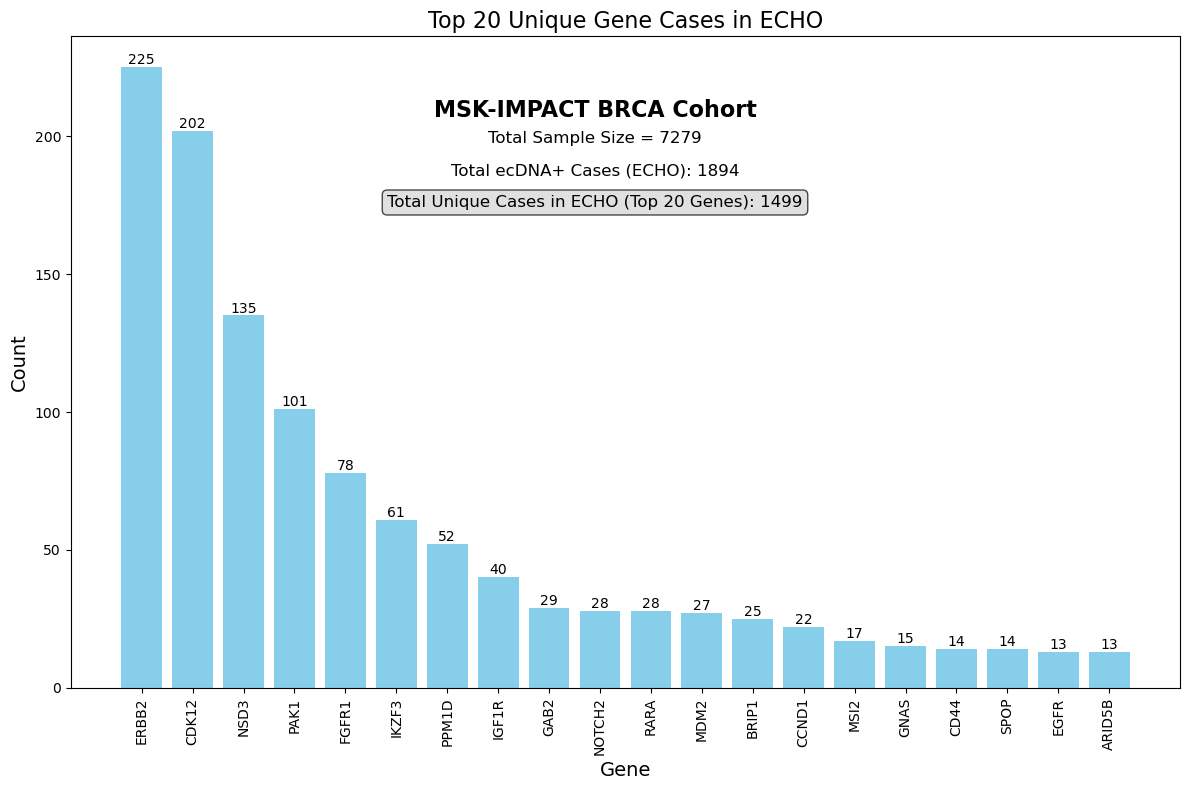

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the data
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
file1_path = os.path.join(directory, "merged.ECHO_results.csv")
file2_path = os.path.join(directory, "merged_ecDNA_results_filtered_p_ecDNA_filtered_impactGeneList.tsv")

old_data = pd.read_csv(file1_path)
new_data = pd.read_csv(file2_path, sep='\t')

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter for ecDNA+ cases (ecDNA_prob >= 0.5)
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)]
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)]

# Extract unique sample-gene pairs for each dataset
old_ecDNA_set_gene = set(old_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1))
new_ecDNA_set_gene = set(new_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1))

# Identify unique cases to ECHO
unique_echo_cases = old_ecDNA[~old_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1).isin(new_ecDNA_set_gene)]

# Count the unique cases by gene, showing only the top 20 genes
unique_echo_gene_counts = unique_echo_cases['gene'].value_counts().nlargest(20)

# Correct count of total ecDNA+ cases for ECHO (unique sample-gene pairs)
total_ecDNA_plus_cases_echo = old_ecDNA[['sample_id', 'gene']].drop_duplicates().shape[0]

# Create the bar plot for the top 20 genes
plt.figure(figsize=(12, 8))
bar_plot = plt.bar(unique_echo_gene_counts.index, unique_echo_gene_counts.values, color='skyblue')

# Add count annotations on top of each bar
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title('Top 20 Unique Gene Cases in ECHO', fontsize=16)
plt.xlabel('Gene', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)

# Main text annotations for the plot
plt.figtext(0.5, 0.87, "MSK-IMPACT BRCA Cohort", ha='center', va='top', fontsize=16, fontweight="bold")
plt.figtext(0.5, 0.83, "Total Sample Size = 7279", ha='center', va='top', fontsize=12)
plt.figtext(0.5, 0.79, f"Total ecDNA+ Cases (ECHO): {total_ecDNA_plus_cases_echo}", ha='center', va='top', fontsize=12)

# Text box with total unique cases for ECHO (top 20 genes only)
total_unique_cases = unique_echo_cases[['sample_id', 'gene']].drop_duplicates().shape[0]
plt.figtext(0.5, 0.75, f'Total Unique Cases in ECHO (Top 20 Genes): {total_unique_cases}', ha='center', va='top', fontsize=12,
            bbox=dict(facecolor='lightgrey', alpha=0.7, boxstyle='round'))

# Define the output path for saving the plot
output_path = os.path.join(directory, "unique_gene_cases_echo_plot.png")

# Save the plot with high resolution before showing it
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


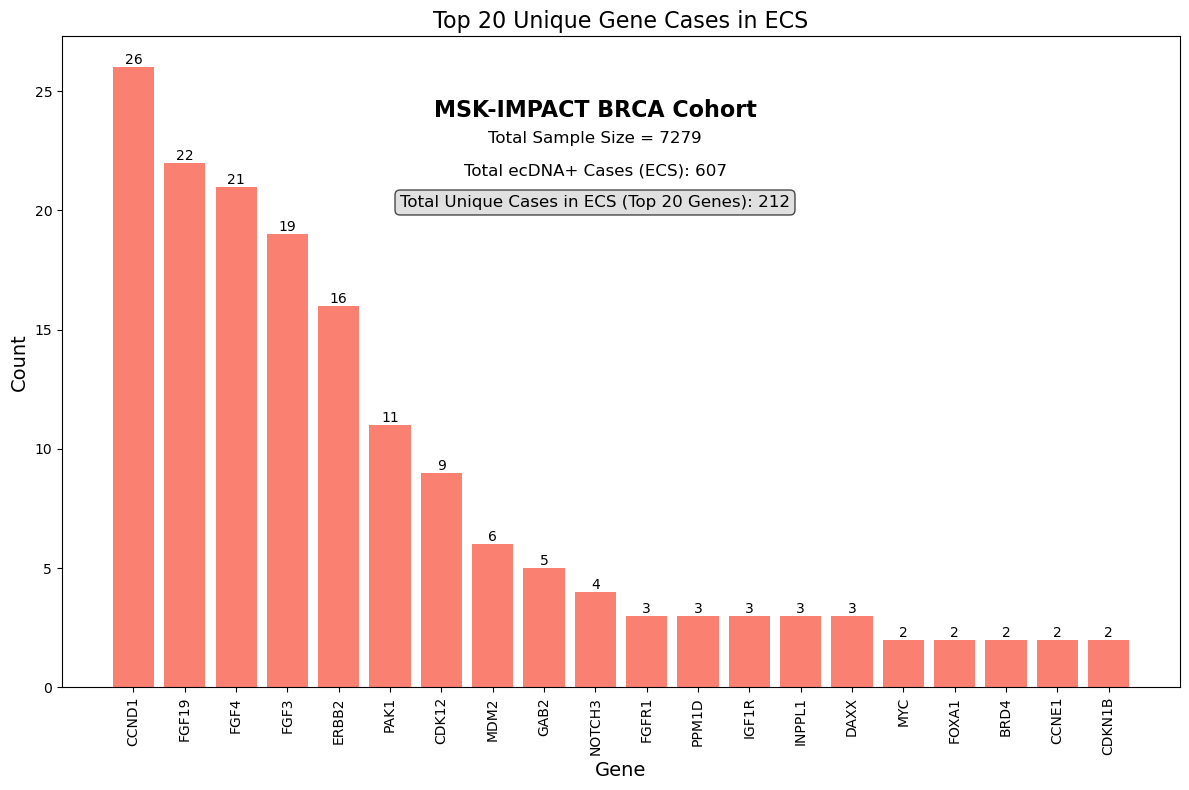

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the data
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
file1_path = os.path.join(directory, "merged.ECHO_results.csv")
file2_path = os.path.join(directory, "merged_ecDNA_results_filtered_p_ecDNA_filtered_impactGeneList.tsv")

old_data = pd.read_csv(file1_path)
new_data = pd.read_csv(file2_path, sep='\t')

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter for ecDNA+ cases (ecDNA_prob >= 0.5)
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)]
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)]

# Extract unique sample-gene pairs for each dataset
old_ecDNA_set_gene = set(old_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1))
new_ecDNA_set_gene = set(new_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1))

# Identify unique cases to ECS
unique_ecs_cases = new_ecDNA[~new_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1).isin(old_ecDNA_set_gene)]

# Count the unique cases by gene, showing only the top 20 genes
unique_ecs_gene_counts = unique_ecs_cases['gene'].value_counts().nlargest(20)

# Total ecDNA+ cases in ECS (total number of rows in new_ecDNA)
total_ecDNA_plus_cases_ecs = new_ecDNA.shape[0]

# Create the bar plot for the top 20 genes in ECS
plt.figure(figsize=(12, 8))
bar_plot = plt.bar(unique_ecs_gene_counts.index, unique_ecs_gene_counts.values, color='salmon')

# Add count annotations on top of each bar
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title('Top 20 Unique Gene Cases in ECS', fontsize=16)
plt.xlabel('Gene', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)

# Main text annotations for the plot, aligned vertically with consistent x-position
plt.figtext(0.5, 0.87, "MSK-IMPACT BRCA Cohort", ha='center', va='top', fontsize=16, fontweight="bold")
plt.figtext(0.5, 0.83, "Total Sample Size = 7279", ha='center', va='top', fontsize=12)
plt.figtext(0.5, 0.79, f"Total ecDNA+ Cases (ECS): {total_ecDNA_plus_cases_ecs}", ha='center', va='top', fontsize=12)

# Text box with total unique cases for ECS (top 20 genes only)
total_unique_cases_ecs = unique_ecs_cases[['sample_id', 'gene']].drop_duplicates().shape[0]
plt.figtext(0.5, 0.75, f'Total Unique Cases in ECS (Top 20 Genes): {total_unique_cases_ecs}', ha='center', va='top', fontsize=12,
            bbox=dict(facecolor='lightgrey', alpha=0.7, boxstyle='round'))

# Save the plot in the same directory
output_path = os.path.join(directory, "unique_gene_cases_ecs_plot.png")
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


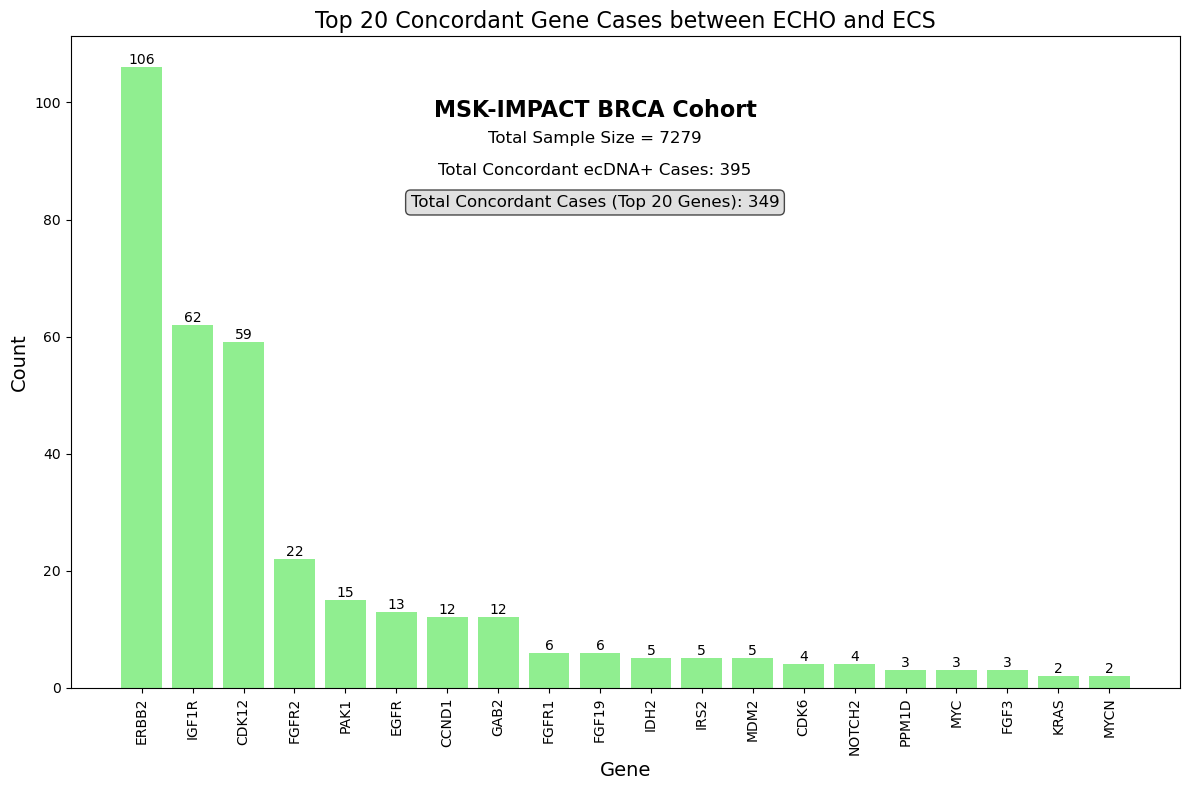

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the data
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
file1_path = os.path.join(directory, "merged.ECHO_results.csv")
file2_path = os.path.join(directory, "merged_ecDNA_results_filtered_p_ecDNA_filtered_impactGeneList.tsv")

old_data = pd.read_csv(file1_path)
new_data = pd.read_csv(file2_path, sep='\t')

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter for ecDNA+ cases (ecDNA_prob >= 0.5)
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)]
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)]

# Extract unique sample-gene pairs for each dataset
old_ecDNA_set_gene = set(old_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1))
new_ecDNA_set_gene = set(new_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1))

# Identify concordant cases (present in both ECHO and ECS) and drop duplicates for unique sample-gene pairs
concordant_cases = old_ecDNA[old_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1).isin(new_ecDNA_set_gene)]
concordant_cases = concordant_cases.drop_duplicates(subset=['sample_id', 'gene'])

# Count the concordant cases by gene, showing only the top 20 genes
concordant_gene_counts = concordant_cases['gene'].value_counts().nlargest(20)

# Total concordant cases across all genes (for annotation)
total_concordant_cases = concordant_cases.shape[0]

# Create the bar plot for the top 20 concordant genes
plt.figure(figsize=(12, 8))
bar_plot = plt.bar(concordant_gene_counts.index, concordant_gene_counts.values, color='lightgreen')

# Add count annotations on top of each bar
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title('Top 20 Concordant Gene Cases between ECHO and ECS', fontsize=16)
plt.xlabel('Gene', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)

# Main text annotations for the plot with adjusted spacing
plt.figtext(0.5, 0.87, "MSK-IMPACT BRCA Cohort", ha='center', va='top', fontsize=16, fontweight="bold")
plt.figtext(0.5, 0.83, "Total Sample Size = 7279", ha='center', va='top', fontsize=12)
plt.figtext(0.5, 0.79, f"Total Concordant ecDNA+ Cases: {total_concordant_cases}", ha='center', va='top', fontsize=12)

# Text box with total concordant cases for the top 20 genes only, lowered for better spacing
total_top_20_concordant_cases = concordant_gene_counts.sum()
plt.figtext(0.5, 0.75, f'Total Concordant Cases (Top 20 Genes): {total_top_20_concordant_cases}', ha='center', va='top', fontsize=12,
            bbox=dict(facecolor='lightgrey', alpha=0.7, boxstyle='round'))

# Save the plot in the same directory
output_path = os.path.join(directory, "concordant_gene_cases_plot.png")
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


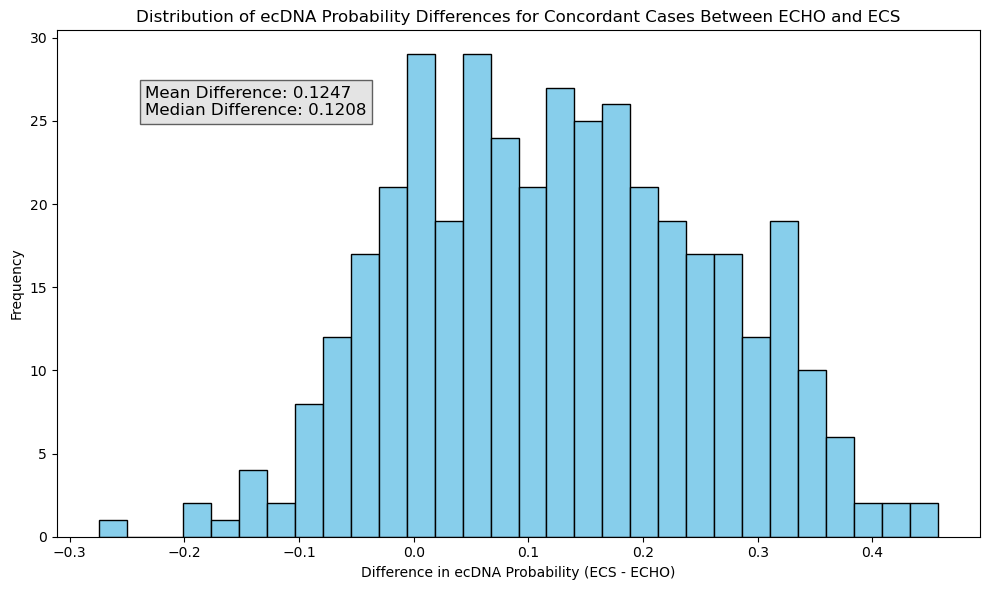

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the data
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
file1_path = os.path.join(directory, "merged.ECHO_results.csv")
file2_path = os.path.join(directory, "merged_ecDNA_results_filtered_p_ecDNA_filtered_impactGeneList.tsv")

old_data = pd.read_csv(file1_path)
new_data = pd.read_csv(file2_path, sep='\t')

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter for ecDNA+ cases (ecDNA_prob >= 0.5)
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)]
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)]

# Ensure unique sample-gene pairs by dropping duplicates
old_ecDNA = old_ecDNA.drop_duplicates(subset=['sample_id', 'gene'])
new_ecDNA = new_ecDNA.drop_duplicates(subset=['sample_id', 'gene'])

# Identify concordant cases (present in both ECHO and ECS)
concordant_cases = old_ecDNA.merge(new_ecDNA, on=['sample_id', 'gene'], suffixes=('_old', '_new'))

# Calculate the difference in ecDNA_prob between versions
concordant_cases['ecDNA_prob_diff'] = concordant_cases['ecDNA_prob_new'] - concordant_cases['ecDNA_prob_old']

# Plot the distribution of ecDNA probability differences
plt.figure(figsize=(10, 6))
plt.hist(concordant_cases['ecDNA_prob_diff'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of ecDNA Probability Differences for Concordant Cases Between ECHO and ECS')
plt.xlabel('Difference in ecDNA Probability (ECS - ECHO)')
plt.ylabel('Frequency')

# Add text annotation for summary statistics
mean_diff = concordant_cases['ecDNA_prob_diff'].mean()
median_diff = concordant_cases['ecDNA_prob_diff'].median()
plt.figtext(0.15, 0.8, f'Mean Difference: {mean_diff:.4f}\nMedian Difference: {median_diff:.4f}', ha='left', fontsize=12, bbox=dict(facecolor='lightgrey', alpha=0.6))

# Save the plot in the same directory
output_path = os.path.join(directory, "ecDNA_prob_diff_concordant_cases_plot.png")
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


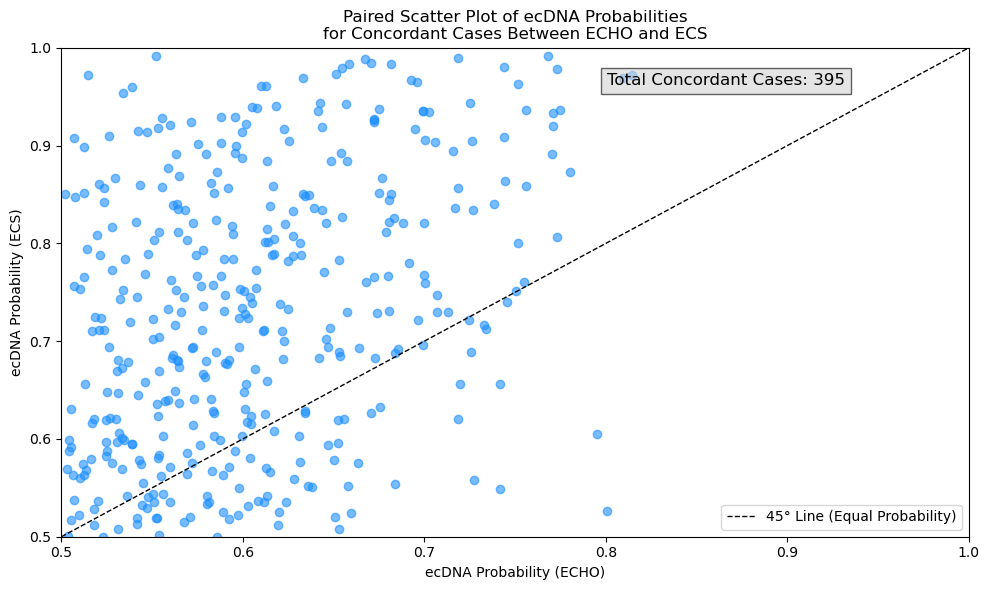

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the data
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
file1_path = os.path.join(directory, "merged.ECHO_results.csv")
file2_path = os.path.join(directory, "merged_ecDNA_results_filtered_p_ecDNA_filtered_impactGeneList.tsv")

old_data = pd.read_csv(file1_path)
new_data = pd.read_csv(file2_path, sep='\t')

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter for ecDNA+ cases (ecDNA_prob >= 0.5)
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)]
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)]

# Ensure unique sample-gene pairs by dropping duplicates
old_ecDNA = old_ecDNA.drop_duplicates(subset=['sample_id', 'gene'])
new_ecDNA = new_ecDNA.drop_duplicates(subset=['sample_id', 'gene'])

# Identify concordant cases (present in both ECHO and ECS)
concordant_cases = old_ecDNA.merge(new_ecDNA, on=['sample_id', 'gene'], suffixes=('_old', '_new'))

# Calculate total count of concordant cases
total_concordant_cases = concordant_cases.shape[0]

# Plot paired scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(concordant_cases['ecDNA_prob_old'], concordant_cases['ecDNA_prob_new'], alpha=0.6, color='dodgerblue')
plt.plot([0.5, 1], [0.5, 1], 'k--', linewidth=1, label='45° Line (Equal Probability)')

# Set axis limits from 0.5 to 1
plt.xlim(0.5, 1)
plt.ylim(0.5, 1)

# Add plot title and labels
plt.title('Paired Scatter Plot of ecDNA Probabilities\nfor Concordant Cases Between ECHO and ECS')
plt.xlabel('ecDNA Probability (ECHO)')
plt.ylabel('ecDNA Probability (ECS)')
plt.legend()

# Add a text box with the total count of concordant cases in the top-right corner
plt.figtext(0.85, 0.85, f'Total Concordant Cases: {total_concordant_cases}', ha='right', fontsize=12, bbox=dict(facecolor='lightgrey', alpha=0.6))

# Save the plot in the same directory
output_path = os.path.join(directory, "paired_scatter_ecDNA_prob_concordant_cases.png")
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


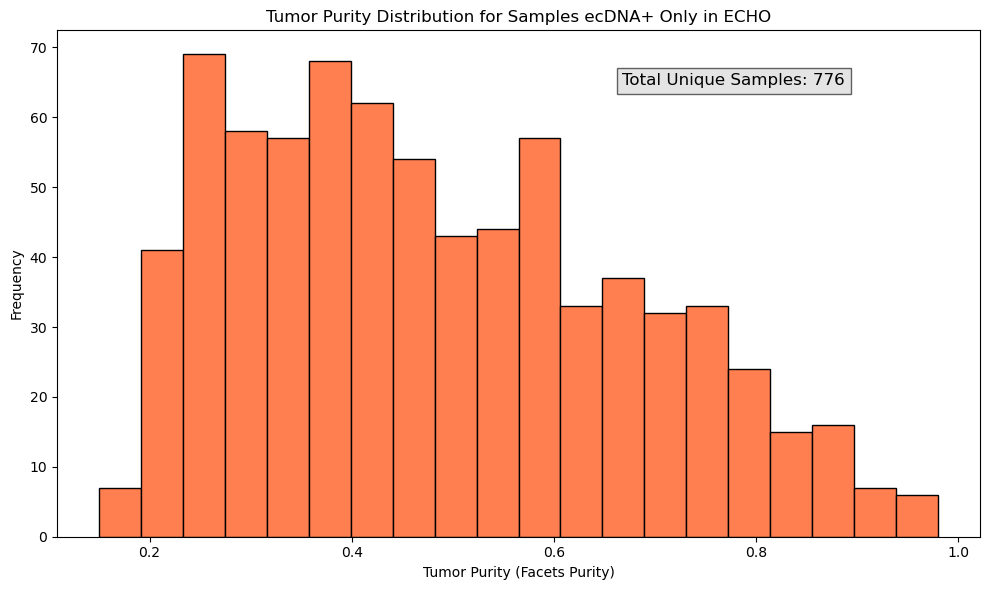

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define file paths
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
echo_file = os.path.join(directory, "merged.ECHO_results.csv")
ecs_file = os.path.join(directory, "merged_ecDNA_results_filtered_p_ecDNA_filtered_impactGeneList.tsv")
purity_file = os.path.join(directory, "facets_cbioportal_merged.tsv")

# Load data
old_data = pd.read_csv(echo_file)
new_data = pd.read_csv(ecs_file, sep='\t')
purity_data = pd.read_csv(purity_file, sep='\t')

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter for ecDNA+ cases (ecDNA_prob >= 0.5) in ECHO and ECS
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)].drop_duplicates(subset=['sample_id', 'gene'])
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)].drop_duplicates(subset=['sample_id', 'gene'])

# Identify samples that are ecDNA+ only in ECHO
old_ecDNA_set = set(old_ecDNA['sample_id'])
new_ecDNA_set = set(new_ecDNA['sample_id'])
only_echo_samples = old_ecDNA_set - new_ecDNA_set

# Filter purity data for samples that are only ecDNA+ in ECHO
only_echo_purity_data = purity_data[purity_data['ID'].isin(only_echo_samples)]

# Plot Tumor Purity for these samples
plt.figure(figsize=(10, 6))
plt.hist(only_echo_purity_data['Facets Purity'], bins=20, color='coral', edgecolor='black')
plt.title('Tumor Purity Distribution for Samples ecDNA+ Only in ECHO')
plt.xlabel('Tumor Purity (Facets Purity)')
plt.ylabel('Frequency')

# Add a text box with the total number of unique samples
total_only_echo_samples = only_echo_purity_data['ID'].nunique()
plt.figtext(0.85, 0.85, f'Total Unique Samples: {total_only_echo_samples}', ha='right', fontsize=12, bbox=dict(facecolor='lightgrey', alpha=0.6))

# Save the plot in the same directory
output_path = os.path.join(directory, "tumor_purity_ecDNA_plus_only_echo.png")
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


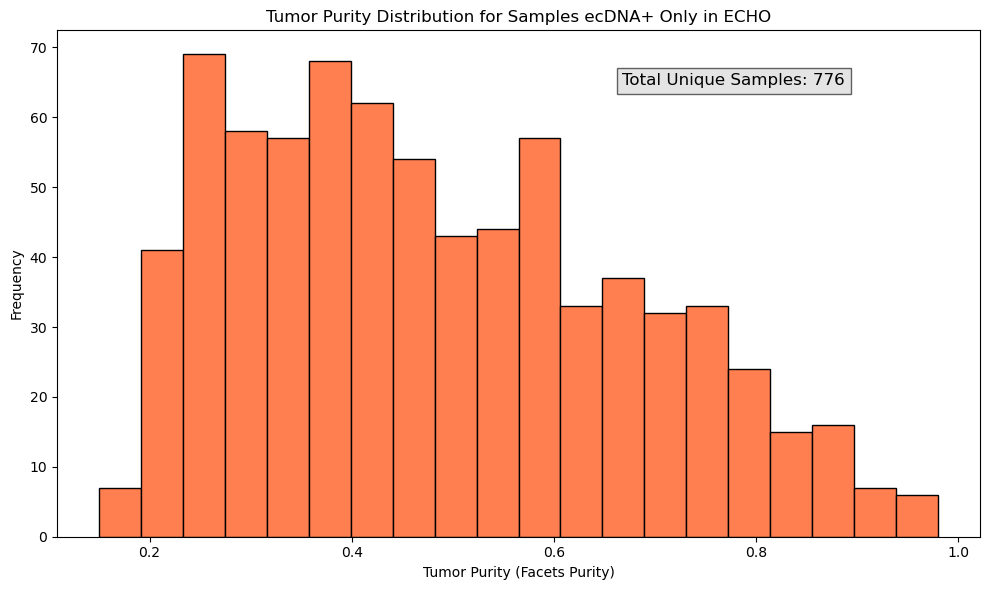

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define file paths
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
echo_file = os.path.join(directory, "merged.ECHO_results.csv")
ecs_file = os.path.join(directory, "merged_ecDNA_results_filtered_p_ecDNA_filtered_impactGeneList.tsv")
purity_file = os.path.join(directory, "facets_cbioportal_merged.tsv")

# Load data
old_data = pd.read_csv(echo_file)
new_data = pd.read_csv(ecs_file, sep='\t')
purity_data = pd.read_csv(purity_file, sep='\t')

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter for ecDNA+ cases (ecDNA_prob >= 0.5) in ECHO and ECS, ensuring unique sample-gene pairs
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)].drop_duplicates(subset=['sample_id', 'gene'])
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)].drop_duplicates(subset=['sample_id', 'gene'])

# Identify unique samples that are ecDNA+ only in ECHO (not in ECS)
old_ecDNA_samples = set(old_ecDNA['sample_id'])
new_ecDNA_samples = set(new_ecDNA['sample_id'])
only_echo_samples = old_ecDNA_samples - new_ecDNA_samples

# Check that the count of unique samples matches the expected 806
assert len(only_echo_samples) == 806, f"Expected 806 unique samples, but found {len(only_echo_samples)}"

# Filter purity data for samples that are only ecDNA+ in ECHO
only_echo_purity_data = purity_data[purity_data['ID'].isin(only_echo_samples)]

# Plot Tumor Purity for these samples
plt.figure(figsize=(10, 6))
plt.hist(only_echo_purity_data['Facets Purity'], bins=20, color='coral', edgecolor='black')
plt.title('Tumor Purity Distribution for Samples ecDNA+ Only in ECHO')
plt.xlabel('Tumor Purity (Facets Purity)')
plt.ylabel('Frequency')

# Add a text box with the total number of unique samples
total_only_echo_samples = only_echo_purity_data['ID'].nunique()
plt.figtext(0.85, 0.85, f'Total Unique Samples: {total_only_echo_samples}', ha='right', fontsize=12, bbox=dict(facecolor='lightgrey', alpha=0.6))

# Save the plot in the same directory
output_path = os.path.join(directory, "tumor_purity_ecDNA_plus_only_echo.png")
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


In [61]:
# Filter for ecDNA+ cases (ecDNA_prob >= 0.5) in ECHO and ECS, ensuring unique sample-gene pairs
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)].drop_duplicates(subset=['sample_id', 'gene'])
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)].drop_duplicates(subset=['sample_id', 'gene'])

# Get unique sample IDs for ecDNA+ cases in ECHO and ECS
old_ecDNA_samples = set(old_ecDNA['sample_id'])
new_ecDNA_samples = set(new_ecDNA['sample_id'])

# Calculate total unique ecDNA+ samples in ECHO
total_unique_echo_samples = len(old_ecDNA_samples)
print(f'Total Unique Positive Samples in ECHO: {total_unique_echo_samples}')

# Calculate total unique concordant samples (ecDNA+ in both ECHO and ECS)
concordant_samples = old_ecDNA_samples & new_ecDNA_samples
total_concordant_samples = len(concordant_samples)
print(f'Total Unique Concordant Samples (ECHO and ECS): {total_concordant_samples}')

# Calculate total unique samples that are ecDNA+ only in ECHO
only_echo_samples = old_ecDNA_samples - new_ecDNA_samples
total_only_echo_samples = len(only_echo_samples)
print(f'Total Unique Samples ecDNA+ Only in ECHO: {total_only_echo_samples}')


Total Unique Positive Samples in ECHO: 1109
Total Unique Concordant Samples (ECHO and ECS): 303
Total Unique Samples ecDNA+ Only in ECHO: 806


In [62]:
# Load data
old_data = pd.read_csv(echo_file)
new_data = pd.read_csv(ecs_file, sep='\t')
purity_data = pd.read_csv(purity_file, sep='\t')

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter for ecDNA+ cases (ecDNA_prob >= 0.5) in ECHO and ECS, ensuring unique sample-gene pairs
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)].drop_duplicates(subset=['sample_id', 'gene'])
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)].drop_duplicates(subset=['sample_id', 'gene'])

# Get unique sample IDs for ecDNA+ cases in ECHO and ECS
old_ecDNA_samples = set(old_ecDNA['sample_id'])
new_ecDNA_samples = set(new_ecDNA['sample_id'])

# Filter purity data to only include samples with available tumor purity data
available_purity_samples = set(purity_data['ID'])

# Calculate total unique ecDNA+ samples in ECHO with purity data available
total_unique_echo_samples = len(old_ecDNA_samples & available_purity_samples)
print(f'Total Unique Positive Samples in ECHO with Purity Data: {total_unique_echo_samples}')

# Calculate total unique concordant samples (ecDNA+ in both ECHO and ECS with purity data available)
concordant_samples = (old_ecDNA_samples & new_ecDNA_samples) & available_purity_samples
total_concordant_samples = len(concordant_samples)
print(f'Total Unique Concordant Samples (ECHO and ECS) with Purity Data: {total_concordant_samples}')

# Calculate total unique samples that are ecDNA+ only in ECHO with purity data available
only_echo_samples = (old_ecDNA_samples - new_ecDNA_samples) & available_purity_samples
total_only_echo_samples = len(only_echo_samples)
print(f'Total Unique Samples ecDNA+ Only in ECHO with Purity Data: {total_only_echo_samples}')


Total Unique Positive Samples in ECHO with Purity Data: 1064
Total Unique Concordant Samples (ECHO and ECS) with Purity Data: 288
Total Unique Samples ecDNA+ Only in ECHO with Purity Data: 776


/tmp/ipykernel_56131/2611892996.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concordant_purity_data['Facets Purity'] = concordant_purity_data['Facets Purity'].fillna(0.2)  # Replace missing values with 0.2
/home/sumans/miniconda2/envs/ecDNA_analysis/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sumans/miniconda2/envs/ecDNA_analysis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

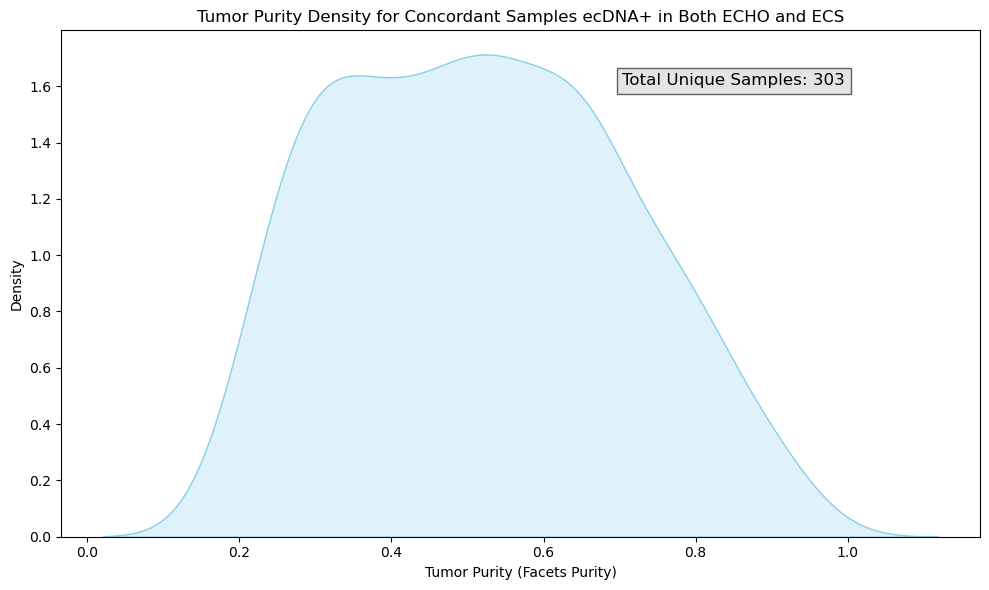

/tmp/ipykernel_56131/2611892996.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_echo_purity_data['Facets Purity'] = only_echo_purity_data['Facets Purity'].fillna(0.2)  # Replace missing values with 0.2
/home/sumans/miniconda2/envs/ecDNA_analysis/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sumans/miniconda2/envs/ecDNA_analysis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option

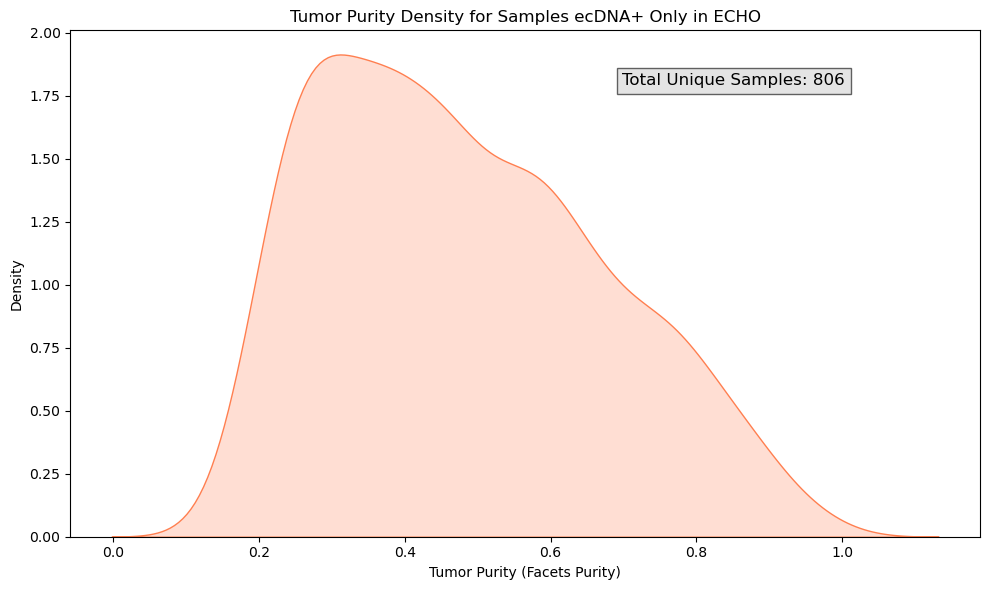

/tmp/ipykernel_56131/2611892996.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_ecs_purity_data['Facets Purity'] = only_ecs_purity_data['Facets Purity'].fillna(0.2)  # Replace missing values with 0.2
/home/sumans/miniconda2/envs/ecDNA_analysis/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sumans/miniconda2/envs/ecDNA_analysis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

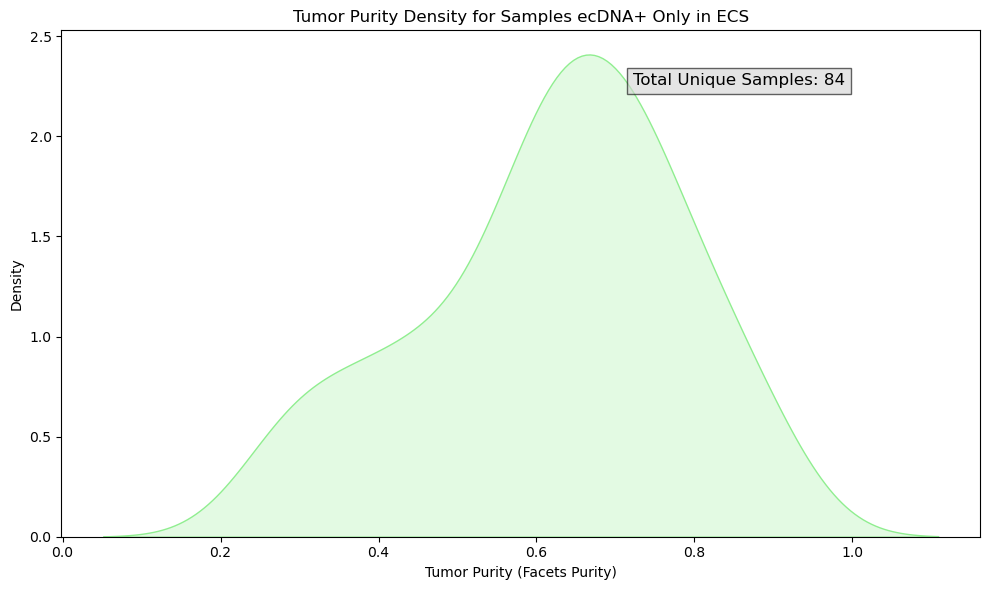

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define file paths
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
echo_file = os.path.join(directory, "merged.ECHO_results.csv")
ecs_file = os.path.join(directory, "merged_ecDNA_results_filtered_p_ecDNA_filtered_impactGeneList.tsv")
purity_file = os.path.join(directory, "facets_cbioportal_merged.tsv")

# Load data
old_data = pd.read_csv(echo_file)
new_data = pd.read_csv(ecs_file, sep='\t')
purity_data = pd.read_csv(purity_file, sep='\t')

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter for ecDNA+ cases (ecDNA_prob >= 0.5) in ECHO and ECS, ensuring unique sample-gene pairs
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)].drop_duplicates(subset=['sample_id', 'gene'])
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)].drop_duplicates(subset=['sample_id', 'gene'])

# Get unique sample IDs for ecDNA+ cases in ECHO and ECS
old_ecDNA_samples = set(old_ecDNA['sample_id'])
new_ecDNA_samples = set(new_ecDNA['sample_id'])

# Define a function to plot KDE for each scenario
def plot_kde(purity_data, title, total_samples, color, output_filename):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(purity_data['Facets Purity'], color=color, fill=True)
    plt.title(title)
    plt.xlabel('Tumor Purity (Facets Purity)')
    plt.ylabel('Density')
    plt.figtext(0.85, 0.85, f'Total Unique Samples: {total_samples}', ha='right', fontsize=12, bbox=dict(facecolor='lightgrey', alpha=0.6))
    output_path = os.path.join(directory, output_filename)
    plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")
    plt.tight_layout()
    plt.show()

# 1. Concordant Samples (ecDNA+ in both ECHO and ECS)
concordant_samples = old_ecDNA_samples & new_ecDNA_samples
concordant_purity_data = purity_data[purity_data['ID'].isin(concordant_samples)]
concordant_purity_data['Facets Purity'] = concordant_purity_data['Facets Purity'].fillna(0.2)  # Replace missing values with 0.2

# Remove any unintended zero or near-zero values from purity data
concordant_purity_data = concordant_purity_data[concordant_purity_data['Facets Purity'] > 0.05]
total_concordant_samples = len(concordant_samples)
plot_kde(concordant_purity_data, 'Tumor Purity Density for Concordant Samples ecDNA+ in Both ECHO and ECS', total_concordant_samples, 'skyblue', "tumor_purity_ecDNA_plus_concordant_samples_density.png")

# 2. Unique ECHO Samples (ecDNA+ only in ECHO)
only_echo_samples = old_ecDNA_samples - new_ecDNA_samples
only_echo_purity_data = purity_data[purity_data['ID'].isin(only_echo_samples)]
only_echo_purity_data['Facets Purity'] = only_echo_purity_data['Facets Purity'].fillna(0.2)  # Replace missing values with 0.2

# Remove any unintended zero or near-zero values from purity data
only_echo_purity_data = only_echo_purity_data[only_echo_purity_data['Facets Purity'] > 0.05]
total_only_echo_samples = len(only_echo_samples)
plot_kde(only_echo_purity_data, 'Tumor Purity Density for Samples ecDNA+ Only in ECHO', total_only_echo_samples, 'coral', "tumor_purity_ecDNA_plus_only_echo_density.png")

# 3. Unique ECS Samples (ecDNA+ only in ECS)
only_ecs_samples = new_ecDNA_samples - old_ecDNA_samples
only_ecs_purity_data = purity_data[purity_data['ID'].isin(only_ecs_samples)]
only_ecs_purity_data['Facets Purity'] = only_ecs_purity_data['Facets Purity'].fillna(0.2)  # Replace missing values with 0.2

# Remove any unintended zero or near-zero values from purity data
only_ecs_purity_data = only_ecs_purity_data[only_ecs_purity_data['Facets Purity'] > 0.05]
total_only_ecs_samples = len(only_ecs_samples)
plot_kde(only_ecs_purity_data, 'Tumor Purity Density for Samples ecDNA+ Only in ECS', total_only_ecs_samples, 'lightgreen', "tumor_purity_ecDNA_plus_only_ecs_density.png")


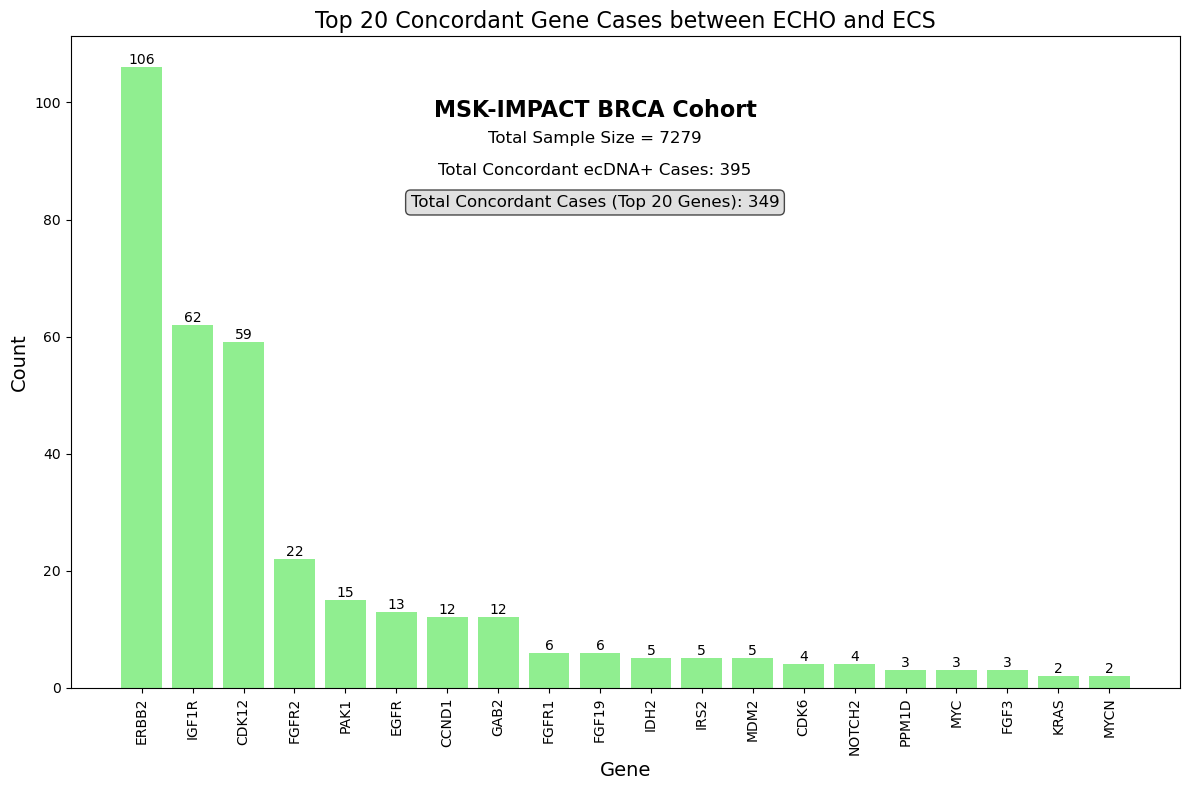

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the data
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
file1_path = os.path.join(directory, "merged.ECHO_results.csv")
file2_path = os.path.join(directory, "merged_ecDNA_results_filtered_p_ecDNA_filtered_impactGeneList.tsv")

old_data = pd.read_csv(file1_path)
new_data = pd.read_csv(file2_path, sep='\t')

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter for ecDNA+ cases (ecDNA_prob >= 0.5)
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)]
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)]

# Extract unique sample-gene pairs for each dataset
old_ecDNA_set_gene = set(old_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1))
new_ecDNA_set_gene = set(new_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1))

# Identify concordant cases (present in both ECHO and ECS) and drop duplicates for unique sample-gene pairs
concordant_cases = old_ecDNA[old_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1).isin(new_ecDNA_set_gene)]
concordant_cases = concordant_cases.drop_duplicates(subset=['sample_id', 'gene'])

# Count the concordant cases by gene, showing only the top 20 genes
concordant_gene_counts = concordant_cases['gene'].value_counts().nlargest(20)

# Total concordant cases across all genes (for annotation)
total_concordant_cases = concordant_cases.shape[0]

# Create the bar plot for the top 20 concordant genes
plt.figure(figsize=(12, 8))
bar_plot = plt.bar(concordant_gene_counts.index, concordant_gene_counts.values, color='lightgreen')

# Add count annotations on top of each bar
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title('Top 20 Concordant Gene Cases between ECHO and ECS', fontsize=16)
plt.xlabel('Gene', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)

# Main text annotations for the plot with adjusted spacing
plt.figtext(0.5, 0.87, "MSK-IMPACT BRCA Cohort", ha='center', va='top', fontsize=16, fontweight="bold")
plt.figtext(0.5, 0.83, "Total Sample Size = 7279", ha='center', va='top', fontsize=12)
plt.figtext(0.5, 0.79, f"Total Concordant ecDNA+ Cases: {total_concordant_cases}", ha='center', va='top', fontsize=12)

# Text box with total concordant cases for the top 20 genes only, lowered for better spacing
total_top_20_concordant_cases = concordant_gene_counts.sum()
plt.figtext(0.5, 0.75, f'Total Concordant Cases (Top 20 Genes): {total_top_20_concordant_cases}', ha='center', va='top', fontsize=12,
            bbox=dict(facecolor='lightgrey', alpha=0.7, boxstyle='round'))

# Save the plot in the same directory
output_path = os.path.join(directory, "concordant_gene_cases_plot.png")
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()
